In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read data
df = pd.read_csv('/content/sakitjantung.csv')
#drop kolom yang tidak diperlukan
df.drop(columns=['id','dataset'], inplace=True)
#melihat data 5 terbawah
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62,Male,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
#melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [ ]:
#melihat deskripsi data
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


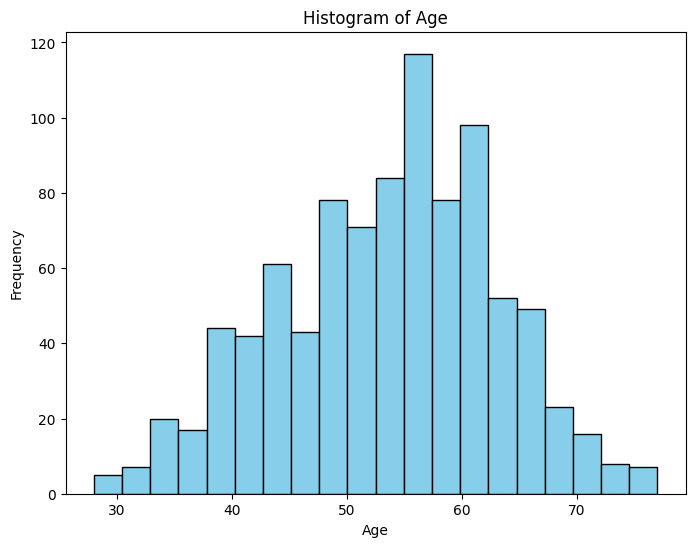

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggambarkan histogram dengan matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##Output:

Interval 50-60 memiliki frekuensi tertinggi, yang ditunjukkan oleh tingginya batang histogram. Rentang ini mencakup banyak observasi atau pasien yang berada dalam kelompok usia tersebut, yang menunjukkan dominasi penyakit jantung dalam rentang tersebut lebih tinggi dibandingkan dengan interval lainnya.


Text(0.5, 1.0, 'Heatmap')

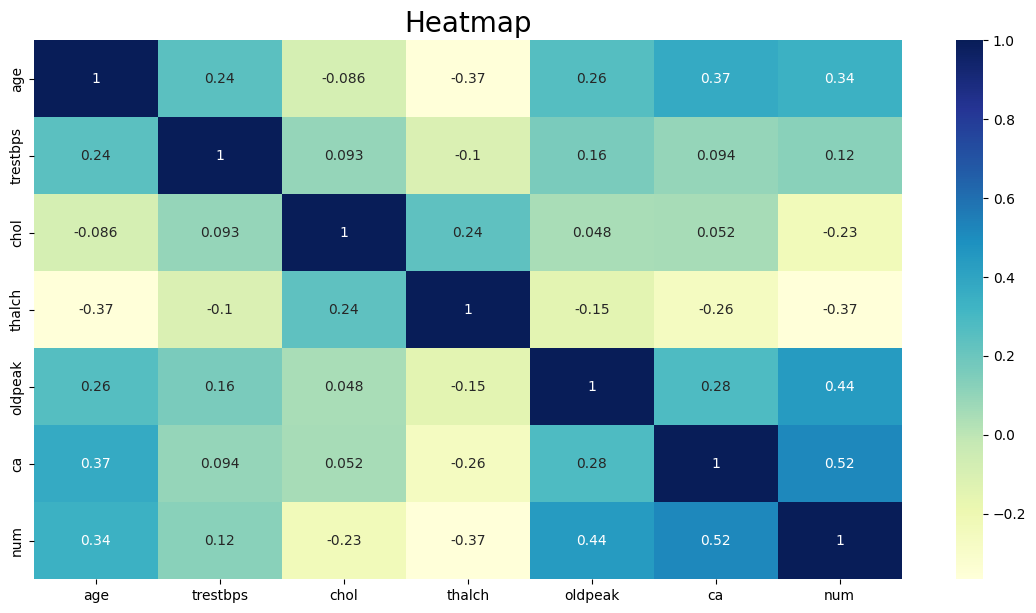

In [ ]:
#korelasi antar kolom dengan heatmap
plt.figure(figsize=(14,7))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='YlGnBu')
plt.title('Heatmap', fontsize=20)

##Output:

Variabel "Num" memiliki korelasi positif terhadap variabel "Age", "Trestbps", "Oldpeak", dan "Ca". Ini berarti ketika nilai variabel independen tersebut (Age, Trestbps, Oldpeak, dan Ca) semakin besar, maka nilai "Num" cenderung meningkat , meskipun mungkin tidak signifikan. <br>

Variabel "Num" memiliki korelasi negatif terhadap variabel "Chol" dan "Thalch".
Artinya, ketika nilai variabel independen "Chol" dan "Thalch" semakin kecil, nilai "Num" cenderung meningkat. Pergerakan grafik dapat diinterpretasikan sebagai hubungan terbalik antara variabel tersebut dan "Num", meskipun hubungannya tidak terlalu kuat.


## Preprocessing

In [ ]:
#mengubah nilai dalam kolom yang berisi data kategori menjadi nilai bilangan bulat
le = LabelEncoder()
for i in df.select_dtypes(include='object'):
    df[i] = le.fit_transform(df[i])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [ ]:
#inisialisasi IterativeImputer
imputer = IterativeImputer()

#menerapkan imputasi pada dataframe
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
#memilih variabel x dan y
x = df.drop('num',axis=1)
y = df['num']

In [ ]:
#metode oversampling digunakan untuk penanganan ketidakseimbangan
ros = RandomOverSampler()
smote = SMOTE()
x,y = ros.fit_resample(x,y)

In [ ]:
#membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,shuffle=True, stratify=y )

## Modelling & Evaluation

In [ ]:
#melatih model
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

In [ ]:
#proses pelatihan dan evaluasi model decision tree
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83        82
         1.0       0.78      0.76      0.77        82
         2.0       0.91      0.99      0.95        82
         3.0       0.90      0.99      0.94        82
         4.0       1.00      1.00      1.00        83

    accuracy                           0.90       411
   macro avg       0.90      0.90      0.90       411
weighted avg       0.90      0.90      0.90       411



In [ ]:
#proses pelatihan dan evaluasi model xgb
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        82
         1.0       0.90      0.73      0.81        82
         2.0       0.92      0.99      0.95        82
         3.0       0.91      1.00      0.95        82
         4.0       0.99      1.00      0.99        83

    accuracy                           0.93       411
   macro avg       0.93      0.93      0.92       411
weighted avg       0.93      0.93      0.92       411



##KESIMPULAN

Setelah dilakukan analisis data maka dapat disimpulkan sebagai berikut:

a.	Prediksi penyakit jantung dengan metode Decision Tree Clasifier menghasilkan nilai akurasi sebesar 90%. Sedangkan metode XGBoost Classifier menghasilkan nilai akurasi sebesar 93%

b.	Prediksi penyakit jantung dengan metode XGBoost Classifier lebih tepat digunakan dan lebih optimal dibandingkan dengan Decision Tree Clasifier. Hal ini dikarenakan XGBoost Classifier memiliki nilai akurasi yang lebih tinggi.


In [ ]:
#melakukan cross-validation dengan menggunakan Stratified K-Fold Cross-Validation
kfold = StratifiedKFold()
score = cross_val_score(xgb, x,y, cv=kfold)
score

array([0.88321168, 0.92457421, 0.91240876, 0.94890511, 0.87104623])

Hasil dari proses cross-validation menggunakan Stratified K-Fold Cross-Validation pada model XGBoost Classifier adalah sebagai berikut:

1. Fold pertama memiliki skor akurasi sekitar 88.32%.
2. Fold kedua memiliki skor akurasi sekitar 92.46%.
3. Fold ketiga memiliki skor akurasi sekitar 91.24%.
4. Fold keempat memiliki skor akurasi sekitar 94.89%.
5. Fold kelima memiliki skor akurasi sekitar 87.10%.

Skor akurasi ini merepresentasikan performa model pada setiap fold. Stratified K-Fold Cross-Validation digunakan untuk memastikan bahwa distribusi kelas pada setiap fold tetap seimbang.